# Chapter 7: Grouping for Aggregation, Filtration and Transformation
## Recipes
* [Defining an aggregation](#Defining-an-aggregation)
* [Grouping and aggregating with multiple columns and functions](#Grouping-and-aggregating-with-multiple-columns-and-functions)
* [Removing the MultiIndex after grouping](#Removing-the-MultiIndex-after-grouping)
* [Customizing an aggregation function](#Customizing-an-aggregation-function)
* [Customizing aggregating functions with \*args and \*\*kwargs](#Customizing-aggregating-functions-with-*args-and-**kwargs)
* [Examining the groupby object](#Examining-a-groupby-object)
* [Filtering for states with a minority majority](#Filtering-for-states-with-a-minority-majority)
* [Transforming through a weight loss bet](#Transforming-through-a-weight-loss)
* [Calculating weighted mean SAT scores per state with apply](#Calculating-weighted-mean-SAT-scores-per-state-with-apply)
* [Grouping by continuous variables](#Grouping-by-continuous-variables)
* [Counting the total number of flights between cities](#Counting-the-total-number-of-flights-between-cities)
* [Finding the longest streak of on-time flights](#Finding-the-longest-streak-of-on-time-flights)

In [1]:
import pandas as pd
import numpy as np

# Defining an aggregation

In [3]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [9]:
# We group by Airline
# then obtain mean(average) for each airline then sort them
flights.groupby('AIRLINE')['ARR_DELAY'].agg('mean').sort_values(ascending=False)

AIRLINE
NK    18.436070
F9    13.630651
B6     8.692593
UA     7.765755
OO     7.593463
EV     7.034580
MQ     6.860591
WN     6.397353
AA     5.542661
VX     5.348884
HA     4.972973
US     1.681105
DL     0.339691
AS    -0.833333
Name: ARR_DELAY, dtype: float64

In [14]:
flights.groupby('AIRLINE').agg({'ARR_DELAY':'mean','DIST':'sum'}).head()

,ARR_DELAY,DIST
AIRLINE,,
AA,5.542661,9917696
AS,-0.833333,818599
B6,8.692593,962132
DL,0.339691,9185220
EV,7.034580,2696071


In [15]:
# Here we pass a function to be perfromed on each group
flights.groupby('AIRLINE')['ARR_DELAY'].agg(np.mean).head()

AIRLINE
AA    5.542661
AS   -0.833333
B6    8.692593
DL    0.339691
EV    7.034580
Name: ARR_DELAY, dtype: float64

In [21]:
len([1,2])

2

In [22]:
arr=list(range(10))

In [23]:
arr[0.95*len(arr)]

TypeError: list indices must be integers or slices, not float

In [24]:
def mysum(arr):
    return sorted(arr)[int(0.95*len(arr))]

In [25]:
flights.groupby('AIRLINE')['DIST'].agg(mysum).head()

AIRLINE
AA    2402
AS    2182
B6    2704
DL    2139
EV     961
Name: DIST, dtype: int64

In [ ]:
#flights.groupby('AIRLINE')['DIST'].agg()

In [16]:
flights.groupby('AIRLINE')['DIST'].agg(np.sum).head()

AIRLINE
AA    9917696
AS     818599
B6     962132
DL    9185220
EV    2696071
Name: DIST, dtype: int64

In [6]:
flights.groupby('AIRLINE')['ARR_DELAY'].mean().head()

AIRLINE
AA    5.542661
AS   -0.833333
B6    8.692593
DL    0.339691
EV    7.034580
Name: ARR_DELAY, dtype: float64

## How it works...

In [26]:
grouped = flights.groupby('AIRLINE')
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [27]:
grouped.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
5,1,1,4,UA,IAH,SAN,1450,1.0,178.0,1303,1620,-14.0,0,0
6,1,1,4,AA,DFW,MSY,1250,84.0,64.0,447,1410,83.0,0,0
7,1,1,4,F9,SFO,PHX,1020,-7.0,91.0,651,1315,-6.0,0,0
8,1,1,4,AA,ORD,STL,1845,-5.0,44.0,258,1950,-5.0,0,0
9,1,1,4,UA,IAH,SJC,925,3.0,215.0,1608,1136,-14.0,0,0


## There's more

In [ ]:
# built in aggregate functions from pandas
# min, max, mean, median, sum, count, std, var, size, describe, nunique, idxmin, idxmax

In [28]:
from scipy import stats

In [32]:
myarr = [1,2,3,3,3,5,5,7,-4,-4,5,9,3]
myarr

[1, 2, 3, 3, 3, 5, 5, 7, -4, -4, 5, 9, 3]

In [33]:
stats.mode(myarr)

ModeResult(mode=array([3]), count=array([4]))

In [35]:
flights.shape

(58492, 14)

In [29]:
flights.groupby('AIRLINE')['ARR_DELAY'].agg(stats.mode).head()

AIRLINE
AA    ([-12.0], [275])
AS      ([-5.0], [27])
B6     ([-11.0], [22])
DL    ([-10.0], [380])
EV     ([-7.0], [210])
Name: ARR_DELAY, dtype: object

In [37]:
aa = flights[flights['AIRLINE'] == 'AA']
aa.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
6,1,1,4,AA,DFW,MSY,1250,84.0,64.0,447,1410,83.0,0,0
8,1,1,4,AA,ORD,STL,1845,-5.0,44.0,258,1950,-5.0,0,0
15,1,1,4,AA,DEN,DFW,1445,-6.0,93.0,641,1745,4.0,0,0
26,1,1,4,AA,LAX,AUS,1430,33.0,157.0,1242,1925,41.0,0,0


In [39]:
len(aa)

8900

In [38]:
len(aa[aa['ARR_DELAY'] == -12])

275

In [42]:
%matplotlib inline

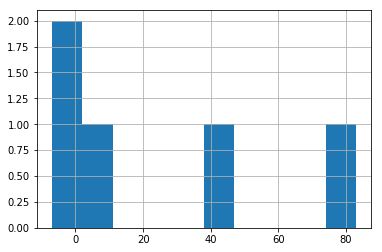

In [43]:
aa['ARR_DELAY'].head().hist()

In [8]:
flights.groupby('AIRLINE')['ARR_DELAY'].agg(np.sqrt)

/Users/Ted/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:842: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: func(x, *args, **kwargs)
/Users/Ted/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:3015: RuntimeWarning: invalid value encountered in sqrt
  output = func(group, *args, **kwargs)


Exception: Must produce aggregated value

# Grouping and aggregating with multiple columns and functions

In [44]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [47]:
# The number of cancelled flights for every airline per day weekday
cancelled = flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED'].agg('sum')
cancelled[14:28]

AIRLINE  WEEKDAY
B6       1           0
         2           1
         3           0
         4           0
         5           0
         6           0
         7           0
DL       1          10
         2           8
         3           8
         4           3
         5           3
         6           4
         7           2
Name: CANCELLED, dtype: int64

In [48]:
type(cancelled)

pandas.core.series.Series

In [64]:
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.00,94.00,590,1905,65.00,0,0
1,1,1,4,UA,DEN,IAD,823,7.00,154.00,1452,1333,-13.00,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.00,85.00,641,1453,35.00,0,0
3,1,1,4,AA,DFW,DCA,1555,7.00,126.00,1192,1935,-7.00,0,0
4,1,1,4,WN,LAX,MCI,1720,48.00,166.00,1363,2225,39.00,0,0


In [66]:
bymonth = flights.groupby(['AIRLINE', 'MONTH','WEEKDAY'])['CANCELLED'].agg('count')
len(bymonth)

1024

In [68]:
bymonth.head()

AIRLINE  MONTH  WEEKDAY
AA       1      1           94
                2           77
                3          100
                4          108
                5          104
Name: CANCELLED, dtype: int64

In [82]:
a2c = bymonth['A':'C']

AIRLINE  MONTH  WEEKDAY
AA       1      2           77
                3          100
                4          108
                5          104
Name: CANCELLED, dtype: int64

In [52]:
byweek = flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED'].agg('count')
byweek.head()

AIRLINE  WEEKDAY
AA       1          1277
         2          1226
         3          1339
         4          1333
         5          1272
Name: CANCELLED, dtype: int64

In [54]:
df['Flights'] = byweek
df.head(30)

CANCELLED  Flights
AIRLINE WEEKDAY                    
AA      1               41     1277
        2                9     1226
        3               16     1339
        4               20     1333
        5               18     1272
        6               21     1125
        7               29     1328
AS      1                0      118
        2                0      106
        3                0      115
        4                0      110
        5                0      109
        6                0      103
        7                0      107
B6      1                0       70
        2                1       79
        3                0       78
        4                0       84
        5                0       84
        6                0       60
        7                0       88
DL      1               10     1648
        2                8     1536
        3                8     1559
        4                3     1546
        5                3     1514
        6                4     1252
        7                2     1546
EV      1               30      879
        2               21      878

In [55]:
df['Percentage'] = df['CANCELLED']/df['Flights']*100
df.head()

CANCELLED  Flights  Percentage
AIRLINE WEEKDAY                                
AA      1               41     1277    3.210650
        2                9     1226    0.734095
        3               16     1339    1.194922
        4               20     1333    1.500375
        5               18     1272    1.415094

In [56]:
df.to_csv('canc_flights.csv')

In [62]:
df2 = pd.read_csv('canc_flights.csv')
df2.head()

,AIRLINE,WEEKDAY,CANCELLED,Flights,Percentage
0,AA,1,41,1277,3.210650
1,AA,2,9,1226,0.734095
2,AA,3,16,1339,1.194922
3,AA,4,20,1333,1.500375
4,AA,5,18,1272,1.415094


In [63]:
# Display only last 2 digits for ALL float columns
pd.options.display.float_format = '{:,.2f}'.format
df2.head()

,AIRLINE,WEEKDAY,CANCELLED,Flights,Percentage
0,AA,1,41,1277,3.21
1,AA,2,9,1226,0.73
2,AA,3,16,1339,1.19
3,AA,4,20,1333,1.50
4,AA,5,18,1272,1.42


In [59]:
# here we destroy the original Percentage values, so better save it beforehand
df['Percentage'] = df['Percentage'].round(2).head()

In [61]:
df.head(50)

CANCELLED  Flights  Percentage
AIRLINE WEEKDAY                                
AA      1               41     1277        3.21
        2                9     1226        0.73
        3               16     1339        1.19
        4               20     1333        1.50
        5               18     1272        1.42
        6               21     1125         NaN
        7               29     1328         NaN
AS      1                0      118         NaN
        2                0      106         NaN
        3                0      115         NaN
        4                0      110         NaN
        5                0      109         NaN
        6                0      103         NaN
        7                0      107         NaN
B6      1                0       70         NaN
        2                1       79         NaN
        3                0       78         NaN
        4                0       84         NaN
        5                0       84         NaN
        6                0       60         NaN
        7                0       88         NaN
DL      1               10     1648         NaN
        2                8     1536         NaN
        3                8     1559         NaN
        4                3     1546         NaN
        5                3     1514         NaN
        6                4     1252         NaN
        7                2     1546         NaN
EV      1               30      879         NaN
        2               21      878         NaN
        3               20      873         NaN
        4               22      818         NaN
        5               11      839         NaN
        6               16      711         NaN
        7               26      860         NaN
F9      1                3      186         NaN
        2                1      186         NaN
        3                0      192         NaN
        4                0      186         NaN
        5                1      194         NaN
        6                2      181         NaN
        7                3      192         NaN
HA      1                0       19         NaN
        2                0       19         NaN
        3                0       19         NaN
        4                0       15         NaN
        5                0       11         NaN
        6                0       12         NaN
        7                0       17         NaN
MQ      1               44      507         NaN

In [49]:
df = pd.DataFrame(cancelled)
df.head()

CANCELLED
AIRLINE WEEKDAY           
AA      1               41
        2                9
        3               16
        4               20
        5               18

In [46]:
len(flights[flights['AIRLINE']=='AS'])

768

In [11]:
#Find the number and percentage of cancelled and diverted flights for every airline per weekday
flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED', 'DIVERTED'].agg(['sum', 'mean']).head(7)

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
        6              21  0.018667        9  0.008000
        7              29  0.021837        1  0.000753

In [83]:
# For each origin to destination flight, find the total number of flights, 
# the number and percentage of cancelled flights and the average and variance of the airtime. 
group_cols = ['ORG_AIR', 'DEST_AIR']
agg_dict = {'CANCELLED':['sum', 'mean', 'size'], 
            'AIR_TIME':['mean', 'var']}
flights.groupby(group_cols).agg(agg_dict).head()
# flights.groupby(['ORG_AIR', 'DEST_AIR']).agg({'CANCELLED': ['sum', 'mean', 'size'], 
#                                               'AIR_TIME':['mean', 'var']}).head()

CANCELLED           AIR_TIME      
                       sum mean size     mean   var
ORG_AIR DEST_AIR                                   
ATL     ABE              0 0.00   31    96.39 45.78
        ABQ              0 0.00   16   170.50 87.87
        ABY              0 0.00   19    28.58  6.59
        ACY              0 0.00    6    91.33 11.47
        AEX              0 0.00   40    78.72 47.33

# Removing the MultiIndex after grouping

In [13]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [14]:
airline_info = flights.groupby(['AIRLINE', 'WEEKDAY'])\
                      .agg({'DIST':['sum', 'mean'], 
                                    'ARR_DELAY':['min', 'max']}).astype(int)
airline_info.head()

DIST       ARR_DELAY     
                     sum  mean       min  max
AIRLINE WEEKDAY                              
AA      1        1455386  1139       -60  551
        2        1358256  1107       -52  725
        3        1496665  1117       -45  473
        4        1452394  1089       -46  349
        5        1427749  1122       -41  732

In [15]:
level0 = airline_info.columns.get_level_values(0)
level0

Index(['DIST', 'DIST', 'ARR_DELAY', 'ARR_DELAY'], dtype='object')

In [16]:
level1 = airline_info.columns.get_level_values(1)
level1

Index(['sum', 'mean', 'min', 'max'], dtype='object')

In [17]:
airline_info.columns = level0 + '_' + level1

In [18]:
airline_info.head(7)

DIST_sum  DIST_mean  ARR_DELAY_min  ARR_DELAY_max
AIRLINE WEEKDAY                                                   
AA      1         1455386       1139            -60            551
        2         1358256       1107            -52            725
        3         1496665       1117            -45            473
        4         1452394       1089            -46            349
        5         1427749       1122            -41            732
        6         1265340       1124            -50            858
        7         1461906       1100            -49            626

In [19]:
airline_info.reset_index().head(7)

,AIRLINE,WEEKDAY,DIST_sum,DIST_mean,ARR_DELAY_min,ARR_DELAY_max
0,AA,1,1455386,1139,-60,551
1,AA,2,1358256,1107,-52,725
2,AA,3,1496665,1117,-45,473
3,AA,4,1452394,1089,-46,349
4,AA,5,1427749,1122,-41,732
5,AA,6,1265340,1124,-50,858
6,AA,7,1461906,1100,-49,626


## There's more...

In [20]:
flights.groupby(['AIRLINE'], as_index=False)['DIST'].agg('mean').round(0)

,AIRLINE,DIST
0,AA,1114.0
1,AS,1066.0
2,B6,1772.0
3,DL,866.0
4,EV,460.0
5,F9,970.0
6,HA,2615.0
7,MQ,404.0
8,NK,1047.0
9,OO,511.0


In [21]:
flights.groupby(['AIRLINE'], as_index=False, sort=False)['DIST'].agg('mean')

,AIRLINE,DIST
0,WN,809.985626
1,UA,1230.918891
2,MQ,404.229041
3,AA,1114.347865
4,F9,969.593014
5,EV,460.237453
6,OO,511.239375
7,NK,1047.428100
8,US,1181.226625
9,AS,1065.884115


# Customizing an aggregation function

In [22]:
college = pd.read_csv('data/college.csv')
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [23]:
college.groupby('STABBR')['UGDS'].agg(['mean', 'std']).round(0).head()

,mean,std
STABBR,,
AK,2493.0,4052.0
AL,2790.0,4658.0
AR,1644.0,3143.0
AS,1276.0,NaN
AZ,4130.0,14894.0


In [24]:
def max_deviation(s):
    std_score = (s - s.mean()) / s.std()
    return std_score.abs().max()

In [25]:
college.groupby('STABBR')['UGDS'].agg(max_deviation).round(1).head()

STABBR
AK    2.6
AL    5.8
AR    6.3
AS    NaN
AZ    9.9
Name: UGDS, dtype: float64

## There's more...

In [26]:
college.groupby('STABBR')['UGDS', 'SATVRMID', 'SATMTMID'].agg(max_deviation).round(1).head()

,UGDS,SATVRMID,SATMTMID
STABBR,,,
AK,2.6,NaN,NaN
AL,5.8,1.6,1.8
AR,6.3,2.2,2.3
AS,NaN,NaN,NaN
AZ,9.9,1.9,1.4


In [27]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS', 'SATVRMID', 'SATMTMID']\
       .agg([max_deviation, 'mean', 'std']).round(1).head()

UGDS                      SATVRMID               \
                max_deviation    mean     std max_deviation   mean   std   
STABBR RELAFFIL                                                            
AK     0                  2.1  3508.9  4539.5           NaN    NaN   NaN   
       1                  1.1   123.3   132.9           NaN  555.0   NaN   
AL     0                  5.2  3248.8  5102.4           1.6  514.9  56.5   
       1                  2.4   979.7   870.8           1.5  498.0  53.0   
AR     0                  5.8  1793.7  3401.6           1.9  481.1  37.9   

                     SATMTMID               
                max_deviation   mean   std  
STABBR RELAFFIL                             
AK     0                  NaN    NaN   NaN  
       1                  NaN  503.0   NaN  
AL     0                  1.7  515.8  56.7  
       1                  1.4  485.6  61.4  
AR     0                  2.0  503.6  39.0

In [28]:
max_deviation.__name__

'max_deviation'

In [29]:
max_deviation.__name__ = 'Max Deviation'

In [30]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS', 'SATVRMID', 'SATMTMID']\
       .agg([max_deviation, 'mean', 'std']).round(1).head()

UGDS                      SATVRMID               \
                Max Deviation    mean     std Max Deviation   mean   std   
STABBR RELAFFIL                                                            
AK     0                  2.1  3508.9  4539.5           NaN    NaN   NaN   
       1                  1.1   123.3   132.9           NaN  555.0   NaN   
AL     0                  5.2  3248.8  5102.4           1.6  514.9  56.5   
       1                  2.4   979.7   870.8           1.5  498.0  53.0   
AR     0                  5.8  1793.7  3401.6           1.9  481.1  37.9   

                     SATMTMID               
                Max Deviation   mean   std  
STABBR RELAFFIL                             
AK     0                  NaN    NaN   NaN  
       1                  NaN  503.0   NaN  
AL     0                  1.7  515.8  56.7  
       1                  1.4  485.6  61.4  
AR     0                  2.0  503.6  39.0

# Customizing aggregating functions with \*args and \*\*kwargs

In [31]:
college = pd.read_csv('data/college.csv')
grouped = college.groupby(['STABBR', 'RELAFFIL'])

In [32]:
import inspect
inspect.signature(grouped.agg)

<Signature (arg, *args, **kwargs)>

## How to do it...

In [33]:
def pct_between_1_3k(s):
    return s.between(1000, 3000).mean()

In [34]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(pct_between_1_3k).head(9)

STABBR  RELAFFIL
AK      0           0.142857
        1           0.000000
AL      0           0.236111
        1           0.333333
AR      0           0.279412
        1           0.111111
AS      0           1.000000
AZ      0           0.096774
        1           0.000000
Name: UGDS, dtype: float64

In [35]:
def pct_between(s, low, high):
    return s.between(low, high).mean()

In [36]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(pct_between, 1000, 10000).head(9)

STABBR  RELAFFIL
AK      0           0.428571
        1           0.000000
AL      0           0.458333
        1           0.375000
AR      0           0.397059
        1           0.166667
AS      0           1.000000
AZ      0           0.233871
        1           0.111111
Name: UGDS, dtype: float64

## How it works...

In [37]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(pct_between, high=10000, low=1000).head(9)

STABBR  RELAFFIL
AK      0           0.428571
        1           0.000000
AL      0           0.458333
        1           0.375000
AR      0           0.397059
        1           0.166667
AS      0           1.000000
AZ      0           0.233871
        1           0.111111
Name: UGDS, dtype: float64

In [38]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(pct_between, 1000, high=10000).head(9)

STABBR  RELAFFIL
AK      0           0.428571
        1           0.000000
AL      0           0.458333
        1           0.375000
AR      0           0.397059
        1           0.166667
AS      0           1.000000
AZ      0           0.233871
        1           0.111111
Name: UGDS, dtype: float64

## There's more...

In [39]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(['mean', pct_between], low=100, high=1000)

TypeError: pct_between() missing 2 required positional arguments: 'low' and 'high'

In [40]:
def make_agg_func(func, name, *args, **kwargs):
    def wrapper(x):
        return func(x, *args, **kwargs)
    wrapper.__name__ = name
    return wrapper

my_agg1 = make_agg_func(pct_between, 'pct_1_3k', low=1000, high=3000)
my_agg2 = make_agg_func(pct_between, 'pct_10_30k', 10000, 30000)

In [41]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(['mean', my_agg1, my_agg2]).head()

mean  pct_1_3k  pct_10_30k
STABBR RELAFFIL                                   
AK     0         3508.857143  0.142857    0.142857
       1          123.333333  0.000000    0.000000
AL     0         3248.774648  0.236111    0.083333
       1          979.722222  0.333333    0.000000
AR     0         1793.691176  0.279412    0.014706

# Examining a groupby object

In [42]:
college = pd.read_csv('data/college.csv')
grouped = college.groupby(['STABBR', 'RELAFFIL'])
type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [43]:
print([attr for attr in dir(grouped) if not attr.startswith('_')])

['CITY', 'CURROPER', 'DISTANCEONLY', 'GRAD_DEBT_MDN_SUPP', 'HBCU', 'INSTNM', 'MD_EARN_WNE_P10', 'MENONLY', 'PCTFLOAN', 'PCTPELL', 'PPTUG_EF', 'RELAFFIL', 'SATMTMID', 'SATVRMID', 'STABBR', 'UG25ABV', 'UGDS', 'UGDS_2MOR', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_NHPI', 'UGDS_NRA', 'UGDS_UNKN', 'UGDS_WHITE', 'WOMENONLY', 'agg', 'aggregate', 'all', 'any', 'apply', 'backfill', 'bfill', 'boxplot', 'corr', 'corrwith', 'count', 'cov', 'cumcount', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'dtypes', 'expanding', 'ffill', 'fillna', 'filter', 'first', 'get_group', 'groups', 'head', 'hist', 'idxmax', 'idxmin', 'indices', 'last', 'mad', 'max', 'mean', 'median', 'min', 'ndim', 'ngroup', 'ngroups', 'nth', 'nunique', 'ohlc', 'pad', 'pct_change', 'plot', 'prod', 'quantile', 'rank', 'resample', 'rolling', 'sem', 'shift', 'size', 'skew', 'std', 'sum', 'tail', 'take', 'transform', 'tshift', 'var']


In [44]:
grouped.ngroups

112

In [45]:
groups = list(grouped.groups.keys())
groups[:6]

[('AK', 0), ('AK', 1), ('AL', 0), ('AL', 1), ('AR', 0), ('AR', 1)]

In [46]:
grouped.get_group(('FL', 1)).head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
712,The Baptist College of Florida,Graceville,FL,0.0,0.0,0.0,1,545.0,465.0,0.0,...,0.0308,0.0000,0.0507,0.2291,1,0.5878,0.5602,0.3531,30800,20052
713,Barry University,Miami,FL,0.0,0.0,0.0,1,470.0,462.0,0.0,...,0.0164,0.0741,0.0841,0.1518,1,0.5045,0.6733,0.4361,44100,28250
714,Gooding Institute of Nurse Anesthesia,Panama City,FL,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PrivacySuppressed
715,Bethune-Cookman University,Daytona Beach,FL,1.0,0.0,0.0,1,405.0,395.0,0.0,...,0.0198,0.0205,0.0190,0.0523,1,0.7758,0.8867,0.0647,29400,36250
724,Johnson University Florida,Kissimmee,FL,0.0,0.0,0.0,1,480.0,470.0,0.0,...,0.0045,0.0045,0.0136,0.1636,1,0.6689,0.7384,0.2185,26300,20199


In [47]:
from IPython.display import display

In [48]:
i = 0
for name, group in grouped:
    print(name)
    display(group.head(2))
    i += 1
    if i == 5:
        break

('AK', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
60,University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5
62,University of Alaska Fairbanks,Fairbanks,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0401,0.0110,0.3060,0.3887,1,0.2263,0.2550,0.4519,36200,19355


('AK', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
61,Alaska Bible College,Palmer,AK,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0370,0.0,0.0000,0.1481,1,0.3571,0.2857,0.4286,NaN,PrivacySuppressed
64,Alaska Pacific University,Anchorage,AK,0.0,0.0,0.0,1,555.0,503.0,0.0,...,0.0945,0.0,0.0873,0.3745,1,0.3152,0.5297,0.4910,47000,23250


('AL', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5


('AL', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
10,Birmingham Southern College,Birmingham,AL,0.0,0.0,0.0,1,560.0,560.0,0.0,...,0.0051,0.0,0.0051,0.0017,1,0.1920,0.4809,0.0152,44200,27000


('AR', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
128,University of Arkansas at Little Rock,Little Rock,AR,0.0,0.0,0.0,0,470.0,510.0,0.0,...,0.0755,0.0283,0.0003,0.4126,1,0.3941,0.4775,0.4062,33900,21736
129,University of Arkansas for Medical Sciences,Little Rock,AR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0281,0.0070,0.0169,0.2433,1,0.3944,0.6144,0.5133,61400,12500


In [49]:
grouped.head(2).head(6)

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
10,Birmingham Southern College,Birmingham,AL,0.0,0.0,0.0,1,560.0,560.0,0.0,...,0.0051,0.0000,0.0051,0.0017,1,0.1920,0.4809,0.0152,44200,27000
43,Prince Institute-Southeast,Elmhurst,IL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.7857,0.9375,0.6569,PrivacySuppressed,20992
60,University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5


## There's more...

In [50]:
grouped.nth([1, -1]).head(8)

CITY  CURROPER  DISTANCEONLY GRAD_DEBT_MDN_SUPP  HBCU  \
STABBR RELAFFIL                                                                
AK     0          Fairbanks         1           0.0              19355   0.0   
       0             Barrow         1           0.0  PrivacySuppressed   0.0   
       1          Anchorage         1           0.0              23250   0.0   
       1           Soldotna         1           0.0  PrivacySuppressed   0.0   
AL     0         Birmingham         1           0.0            21941.5   0.0   
       0             Dothan         1           0.0  PrivacySuppressed   0.0   
       1         Birmingham         1           0.0              27000   0.0   
       1         Huntsville         1           NaN            36173.5   NaN   

                                                  INSTNM MD_EARN_WNE_P10  \
STABBR RELAFFIL                                                            
AK     0                  University of Alaska Fairbanks           36200   
       0                               Ilisagvik College           24900   
       1                       Alaska Pacific University           47000   
       1                        Alaska Christian College             NaN   
AL     0             University of Alabama at Birmingham           39700   
       0         Alabama College of Osteopathic Medicine             NaN   
       1                     Birmingham Southern College           44200   
       1            Strayer University-Huntsville Campus           49200   

                 MENONLY  PCTFLOAN  PCTPELL    ...      UGDS_2MOR  UGDS_AIAN  \
STABBR RELAFFIL                                ...                             
AK     0             0.0    0.2550   0.2263    ...         0.0401     0.1284   
       0             0.0    0.0000   0.1323    ...         0.0000     0.6881   
       1             0.0    0.5297   0.3152    ...         0.0945     0.1855   
       1             0.0    0.6792   0.8868    ...         0.0147     0.7794   
AL     0             0.0    0.5214   0.3460    ...         0.0368     0.0022   
       0             0.0       NaN      NaN    ...            NaN        NaN   
       1             0.0    0.4809   0.1920    ...         0.0051     0.0102   
       1             NaN       NaN      NaN    ...            NaN        NaN   

                 UGDS_ASIAN  UGDS_BLACK  UGDS_HISP  UGDS_NHPI  UGDS_NRA  \
STABBR RELAFFIL                                                           
AK     0             0.0126      0.0210     0.0522     0.0027    0.0110   
       0             0.0826      0.0183     0.0092     0.0459    0.0183   
       1             0.0255      0.0291     0.0364     0.0109    0.0000   
       1             0.0000      0.0000     0.0147     0.0000    0.0000   
AL     0             0.0518      0.2600     0.0283     0.0007    0.0179   
       0                NaN         NaN        NaN        NaN       NaN   
       1             0.0517      0.1102     0.0195     0.0000    0.0000   
       1                NaN         NaN        NaN        NaN       NaN   

                 UGDS_UNKN  UGDS_WHITE  WOMENONLY  
STABBR RELAFFIL                                    
AK     0            0.3060      0.4259        0.0  
       0            0.0000      0.1376        0.0  
       1            0.0873      0.5309        0.0  
       1            0.1324      0.0588        0.0  
AL     0            0.0100      0.5922        0.0  
       0               NaN         NaN        0.0  
       1            0.0051      0.7983        0.0  
       1               NaN         NaN        NaN  

[8 rows x 25 columns]

# Filtering for states with a minority majority

In [51]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
grouped = college.groupby('STABBR')
grouped.ngroups

59

In [52]:
%timeit college['STABBR'].nunique()

285 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [53]:
def check_minority(df, threshold):
    minority_pct = 1 - df['UGDS_WHITE']
    total_minority = (df['UGDS'] * minority_pct).sum()
    total_ugds = df['UGDS'].sum()
    total_minority_pct = total_minority / total_ugds
    return total_minority_pct > threshold

In [54]:
college_filtered = grouped.filter(check_minority, threshold=.5)
college_filtered.head()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Everest College-Phoenix,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,4102.0,...,0.0373,0.0,0.1026,0.4749,0,0.8291,0.7151,0.6700,28600,9500
Collins College,Phoenix,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,83.0,...,0.0241,0.0,0.3855,0.3373,0,0.7205,0.8228,0.4764,25700,47000
Empire Beauty School-Paradise Valley,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,25.0,...,0.0400,0.0,0.0000,0.1600,0,0.6349,0.5873,0.4651,17800,9588
Empire Beauty School-Tucson,Tucson,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,126.0,...,0.0000,0.0,0.0079,0.2222,1,0.7962,0.6615,0.4229,18200,9833
Thunderbird School of Global Management,Glendale,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,1.0,...,0.0000,0.0,0.0000,1.0000,0,0.0000,0.0000,0.0000,118900,PrivacySuppressed


In [55]:
college.shape

(7535, 26)

In [56]:
college_filtered.shape

(3028, 26)

In [57]:
college_filtered['STABBR'].nunique()

20

## There's more...

In [58]:
college_filtered_20 = grouped.filter(check_minority, threshold=.2)
college_filtered_20.shape

(7461, 26)

In [59]:
college_filtered_20['STABBR'].nunique()

57

In [60]:
college_filtered_70 = grouped.filter(check_minority, threshold=.7)
college_filtered_70.shape

(957, 26)

In [61]:
college_filtered_70['STABBR'].nunique()

10

In [62]:
college_filtered_95 = grouped.filter(check_minority, threshold=.95)
college_filtered_95.shape

(156, 26)

# Transforming through a weight-loss 

In [63]:
weight_loss = pd.read_csv('data/weight_loss.csv')
weight_loss.query('Month == "Jan"')

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283
5,Amy,Jan,Week 3,189
6,Bob,Jan,Week 4,283
7,Amy,Jan,Week 4,190


In [64]:
def find_perc_loss(s):
    return (s - s.iloc[0]) / s.iloc[0]

In [65]:
bob_jan = weight_loss.query('Name=="Bob" and Month=="Jan"')
find_perc_loss(bob_jan['Weight'])

0    0.000000
2   -0.010309
4   -0.027491
6   -0.027491
Name: Weight, dtype: float64

In [66]:
pcnt_loss = weight_loss.groupby(['Name', 'Month'])['Weight'].transform(find_perc_loss)
pcnt_loss.head(8)

0    0.000000
1    0.000000
2   -0.010309
3   -0.040609
4   -0.027491
5   -0.040609
6   -0.027491
7   -0.035533
Name: Weight, dtype: float64

In [67]:
weight_loss['Perc Weight Loss'] = pcnt_loss.round(3)
weight_loss.query('Name=="Bob" and Month in ["Jan", "Feb"]')

,Name,Month,Week,Weight,Perc Weight Loss
0,Bob,Jan,Week 1,291,0.000
2,Bob,Jan,Week 2,288,-0.010
4,Bob,Jan,Week 3,283,-0.027
6,Bob,Jan,Week 4,283,-0.027
8,Bob,Feb,Week 1,283,0.000
10,Bob,Feb,Week 2,275,-0.028
12,Bob,Feb,Week 3,268,-0.053
14,Bob,Feb,Week 4,268,-0.053


In [68]:
week4 = weight_loss.query('Week == "Week 4"')
week4

,Name,Month,Week,Weight,Perc Weight Loss
6,Bob,Jan,Week 4,283,-0.027
7,Amy,Jan,Week 4,190,-0.036
14,Bob,Feb,Week 4,268,-0.053
15,Amy,Feb,Week 4,173,-0.089
22,Bob,Mar,Week 4,261,-0.026
23,Amy,Mar,Week 4,170,-0.017
30,Bob,Apr,Week 4,250,-0.042
31,Amy,Apr,Week 4,161,-0.053


In [69]:
winner = week4.pivot(index='Month', columns='Name', values='Perc Weight Loss')
winner

Name,Amy,Bob
Month,,
Apr,-0.053,-0.042
Feb,-0.089,-0.053
Jan,-0.036,-0.027
Mar,-0.017,-0.026


In [70]:
winner['Winner'] = np.where(winner['Amy'] < winner['Bob'], 'Amy', 'Bob')
winner.style.highlight_min(axis=1)

Name,Amy,Bob,Winner
Month,,,
Apr,-0.053,-0.042,Amy
Feb,-0.089,-0.053,Amy
Jan,-0.036,-0.027,Amy
Mar,-0.017,-0.026,Bob


In [71]:
winner.Winner.value_counts()

Amy    3
Bob    1
Name: Winner, dtype: int64

## There's more...

In [72]:
week4a = week4.copy()
month_chron = week4a['Month'].unique() # or month.drop_duplicates
month_chron

array(['Jan', 'Feb', 'Mar', 'Apr'], dtype=object)

In [73]:
week4a['Month'] = pd.Categorical(week4a['Month'], 
                                 categories=month_chron,
                                 ordered=True)
week4a.pivot(index='Month', columns='Name', values='Perc Weight Loss')

Name,Amy,Bob
Month,,
Jan,-0.036,-0.027
Feb,-0.089,-0.053
Mar,-0.017,-0.026
Apr,-0.053,-0.042


# Calculating weighted mean SAT scores per state with apply

In [74]:
college = pd.read_csv('data/college.csv')
subset = ['UGDS', 'SATMTMID', 'SATVRMID']
college2 = college.dropna(subset=subset)
college.shape

(7535, 27)

In [75]:
college2.shape

(1184, 27)

In [76]:
def weighted_math_average(df):
    weighted_math = df['UGDS'] * df['SATMTMID']
    return int(weighted_math.sum() / df['UGDS'].sum())

In [77]:
college2.groupby('STABBR').apply(weighted_math_average).head()

STABBR
AK    503
AL    536
AR    529
AZ    569
CA    564
dtype: int64

In [78]:
college2.groupby('STABBR').agg(weighted_math_average).head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
AK,503,503,503,503,503,503,503,503,503,503,...,503,503,503,503,503,503,503,503,503,503
AL,536,536,536,536,536,536,536,536,536,536,...,536,536,536,536,536,536,536,536,536,536
AR,529,529,529,529,529,529,529,529,529,529,...,529,529,529,529,529,529,529,529,529,529
AZ,569,569,569,569,569,569,569,569,569,569,...,569,569,569,569,569,569,569,569,569,569
CA,564,564,564,564,564,564,564,564,564,564,...,564,564,564,564,564,564,564,564,564,564


In [79]:
college2.groupby('STABBR')['SATMTMID'].agg(weighted_math_average)

KeyError: 'UGDS'

In [80]:
from collections import OrderedDict
def weighted_average(df):
    data = OrderedDict()
    weight_m = df['UGDS'] * df['SATMTMID']
    weight_v = df['UGDS'] * df['SATVRMID']

    data['weighted_math_avg'] = weight_m.sum() / df['UGDS'].sum()
    data['weighted_verbal_avg'] = weight_v.sum() / df['UGDS'].sum()
    data['math_avg'] = df['SATMTMID'].mean()
    data['verbal_avg'] = df['SATVRMID'].mean()
    data['count'] = len(df)
    return pd.Series(data, dtype='int')

college2.groupby('STABBR').apply(weighted_average).head(10)

,weighted_math_avg,weighted_verbal_avg,math_avg,verbal_avg,count
STABBR,,,,,
AK,503,555,503,555,1
AL,536,533,504,508,21
AR,529,504,515,491,16
AZ,569,557,536,538,6
CA,564,539,562,549,72
CO,553,547,540,537,14
CT,545,533,522,517,14
DC,621,623,588,589,6
DE,569,553,495,486,3


In [81]:
from collections import OrderedDict
def weighted_average(df):
    data = OrderedDict()
    weight_m = df['UGDS'] * df['SATMTMID']
    weight_v = df['UGDS'] * df['SATVRMID']

    wm_avg = weight_m.sum() / df['UGDS'].sum()
    wv_avg = weight_v.sum() / df['UGDS'].sum()

    data['weighted_math_avg'] = wm_avg
    data['weighted_verbal_avg'] = wv_avg
    data['math_avg'] = df['SATMTMID'].mean()
    data['verbal_avg'] = df['SATVRMID'].mean()
    data['count'] = len(df)
    return pd.Series(data, dtype='int')

college2.groupby('STABBR').apply(weighted_average).head(10)

,weighted_math_avg,weighted_verbal_avg,math_avg,verbal_avg,count
STABBR,,,,,
AK,503,555,503,555,1
AL,536,533,504,508,21
AR,529,504,515,491,16
AZ,569,557,536,538,6
CA,564,539,562,549,72
CO,553,547,540,537,14
CT,545,533,522,517,14
DC,621,623,588,589,6
DE,569,553,495,486,3


## There's more...

In [82]:
from scipy.stats import gmean, hmean
def calculate_means(df):
    df_means = pd.DataFrame(index=['Arithmetic', 'Weighted', 'Geometric', 'Harmonic'])
    cols = ['SATMTMID', 'SATVRMID']
    for col in cols:
        arithmetic = df[col].mean()
        weighted = np.average(df[col], weights=df['UGDS'])
        geometric = gmean(df[col])
        harmonic = hmean(df[col])
        df_means[col] = [arithmetic, weighted, geometric, harmonic]
        
    df_means['count'] = len(df)
    return df_means.astype(int)

college2.groupby('STABBR').filter(lambda x: len(x) != 1).groupby('STABBR').apply(calculate_means).head(10)

SATMTMID  SATVRMID  count
STABBR                                      
AL     Arithmetic       504       508     21
       Weighted         536       533     21
       Geometric        500       505     21
       Harmonic         497       502     21
AR     Arithmetic       515       491     16
       Weighted         529       504     16
       Geometric        514       489     16
       Harmonic         513       487     16
AZ     Arithmetic       536       538      6
       Weighted         569       557      6

# Grouping by continuous variables

In [83]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [84]:
flights.DIST.hasnans

False

In [85]:
flights.dropna(subset=['DIST']).shape

(58492, 14)

In [86]:
bins = [-np.inf, 200, 500, 1000, 2000, np.inf]
cuts = pd.cut(flights['DIST'], bins=bins)
cuts.head()

0     (500.0, 1000.0]
1    (1000.0, 2000.0]
2     (500.0, 1000.0]
3    (1000.0, 2000.0]
4    (1000.0, 2000.0]
Name: DIST, dtype: category
Categories (5, interval[float64]): [(-inf, 200.0] < (200.0, 500.0] < (500.0, 1000.0] < (1000.0, 2000.0] < (2000.0, inf]]

In [87]:
cuts.value_counts()

(500.0, 1000.0]     20659
(200.0, 500.0]      15874
(1000.0, 2000.0]    14186
(2000.0, inf]        4054
(-inf, 200.0]        3719
Name: DIST, dtype: int64

In [88]:
flights.groupby(cuts)['AIRLINE'].value_counts(normalize=True).round(3).head(15)

DIST            AIRLINE
(-inf, 200.0]   OO         0.326
                EV         0.289
                MQ         0.211
                DL         0.086
                AA         0.052
                UA         0.027
                WN         0.009
(200.0, 500.0]  WN         0.194
                DL         0.189
                OO         0.159
                EV         0.156
                MQ         0.100
                AA         0.071
                UA         0.062
                VX         0.028
Name: AIRLINE, dtype: float64

## How it works...

In [89]:
flights.groupby(cuts)['AIRLINE'].value_counts(normalize=True)

DIST              AIRLINE
(-inf, 200.0]     OO         0.325625
                  EV         0.289325
                  MQ         0.210809
                  DL         0.086045
                  AA         0.052165
                  UA         0.027427
                  WN         0.008604
(200.0, 500.0]    WN         0.193902
                  DL         0.188736
                  OO         0.158687
                  EV         0.156293
                  MQ         0.100164
                  AA         0.071375
                  UA         0.062051
                  VX         0.028222
                  US         0.016001
                  NK         0.011843
                  B6         0.006867
                  F9         0.004914
                  AS         0.000945
(500.0, 1000.0]   DL         0.205625
                  AA         0.143908
                  WN         0.138196
                  UA         0.131129
                  OO         0.106443
                  EV    

## There's more...

In [90]:
flights.groupby(cuts)['AIR_TIME'].quantile(q=[.25, .5, .75]).div(60).round(2)

DIST                  
(-inf, 200.0]     0.25    0.43
                  0.50    0.50
                  0.75    0.57
(200.0, 500.0]    0.25    0.77
                  0.50    0.92
                  0.75    1.05
(500.0, 1000.0]   0.25    1.43
                  0.50    1.65
                  0.75    1.92
(1000.0, 2000.0]  0.25    2.50
                  0.50    2.93
                  0.75    3.40
(2000.0, inf]     0.25    4.30
                  0.50    4.70
                  0.75    5.03
Name: AIR_TIME, dtype: float64

In [91]:
labels=['Under an Hour', '1 Hour', '1-2 Hours', '2-4 Hours', '4+ Hours']
cuts2 = pd.cut(flights['DIST'], bins=bins, labels=labels)
flights.groupby(cuts2)['AIRLINE'].value_counts(normalize=True).round(3).unstack().style.highlight_max(axis=1)

AIRLINE,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
DIST,,,,,,,,,,,,,,
Under an Hour,0.052,nan,nan,0.086,0.289,nan,nan,0.211,nan,0.326,0.027,nan,nan,0.009
1 Hour,0.071,0.001,0.007,0.189,0.156,0.005,nan,0.1,0.012,0.159,0.062,0.016,0.028,0.194
1-2 Hours,0.144,0.023,0.003,0.206,0.101,0.038,nan,0.051,0.03,0.106,0.131,0.025,0.004,0.138
2-4 Hours,0.264,0.016,0.003,0.165,0.016,0.031,nan,0.003,0.045,0.046,0.199,0.04,0.012,0.16
4+ Hours,0.212,0.012,0.08,0.171,nan,0.004,0.028,nan,0.019,nan,0.289,0.065,0.074,0.046


# Counting the total number of flights between cities

In [92]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [93]:
flights_ct = flights.groupby(['ORG_AIR', 'DEST_AIR']).size()
flights_ct.head()

ORG_AIR  DEST_AIR
ATL      ABE         31
         ABQ         16
         ABY         19
         ACY          6
         AEX         40
dtype: int64

In [94]:
flights_ct.loc[[('ATL', 'IAH'), ('IAH', 'ATL')]]

ORG_AIR  DEST_AIR
ATL      IAH         121
IAH      ATL         148
dtype: int64

In [95]:
flights_sort = flights[['ORG_AIR', 'DEST_AIR']].apply(sorted, axis=1)
flights_sort.head()

,ORG_AIR,DEST_AIR
0,LAX,SLC
1,DEN,IAD
2,DFW,VPS
3,DCA,DFW
4,LAX,MCI


In [96]:
rename_dict = {'ORG_AIR':'AIR1','DEST_AIR':'AIR2'}
flights_sort = flights_sort.rename(columns=rename_dict)
flights_ct2 = flights_sort.groupby(['AIR1', 'AIR2']).size()
flights_ct2.head()

AIR1  AIR2
ABE   ATL     31
      ORD     24
ABI   DFW     74
ABQ   ATL     16
      DEN     46
dtype: int64

In [97]:
flights_ct2.loc[('ATL', 'IAH')]

269

In [98]:
flights_ct2.loc[('IAH', 'ATL')]

IndexingError: Too many indexers

## There's more...

In [99]:
data_sorted = np.sort(flights[['ORG_AIR', 'DEST_AIR']])
data_sorted[:10]

array([['LAX', 'SLC'],
       ['DEN', 'IAD'],
       ['DFW', 'VPS'],
       ['DCA', 'DFW'],
       ['LAX', 'MCI'],
       ['IAH', 'SAN'],
       ['DFW', 'MSY'],
       ['PHX', 'SFO'],
       ['ORD', 'STL'],
       ['IAH', 'SJC']], dtype=object)

In [100]:
flights_sort2 = pd.DataFrame(data_sorted, columns=['AIR1', 'AIR2'])
fs_orig = flights_sort.rename(columns={'ORG_AIR':'AIR1', 'DEST_AIR':'AIR2'})
flights_sort2.equals(fs_orig)

True

In [101]:
%timeit flights_sort = flights[['ORG_AIR', 'DEST_AIR']].apply(sorted, axis=1)

7.82 s ± 189 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [102]:
%%timeit
data_sorted = np.sort(flights[['ORG_AIR', 'DEST_AIR']])
flights_sort2 = pd.DataFrame(data_sorted, columns=['AIR1', 'AIR2'])

10.9 ms ± 325 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Finding the longest streak of on-time flights

In [103]:
s = pd.Series([1, 1, 1, 0, 1, 1, 1, 0])
s

0    1
1    1
2    1
3    0
4    1
5    1
6    1
7    0
dtype: int64

In [104]:
s1 = s.cumsum()
s1

0    1
1    2
2    3
3    3
4    4
5    5
6    6
7    6
dtype: int64

In [105]:
s.mul(s1).diff()

0    NaN
1    1.0
2    1.0
3   -3.0
4    4.0
5    1.0
6    1.0
7   -6.0
dtype: float64

In [106]:
s.mul(s1).diff().where(lambda x: x < 0)

0    NaN
1    NaN
2    NaN
3   -3.0
4    NaN
5    NaN
6    NaN
7   -6.0
dtype: float64

In [107]:
s.mul(s1).diff().where(lambda x: x < 0).ffill().add(s1, fill_value=0)

0    1.0
1    2.0
2    3.0
3    0.0
4    1.0
5    2.0
6    3.0
7    0.0
dtype: float64

In [108]:
flights = pd.read_csv('data/flights.csv')
flights['ON_TIME'] = flights['ARR_DELAY'].lt(15).astype(int)
flights[['AIRLINE', 'ORG_AIR', 'ON_TIME']].head(10)

,AIRLINE,ORG_AIR,ON_TIME
0,WN,LAX,0
1,UA,DEN,1
2,MQ,DFW,0
3,AA,DFW,1
4,WN,LAX,0
5,UA,IAH,1
6,AA,DFW,0
7,F9,SFO,1
8,AA,ORD,1
9,UA,IAH,1


In [109]:
def max_streak(s):
    s1 = s.cumsum()
    return s.mul(s1).diff().where(lambda x: x < 0) \
            .ffill().add(s1, fill_value=0).max()

In [110]:
flights.sort_values(['MONTH', 'DAY', 'SCHED_DEP']) \
       .groupby(['AIRLINE', 'ORG_AIR'])['ON_TIME'] \
       .agg(['mean', 'size', max_streak]).round(2).head()

mean  size  max_streak
AIRLINE ORG_AIR                        
AA      ATL      0.82   233          15
        DEN      0.74   219          17
        DFW      0.78  4006          64
        IAH      0.80   196          24
        LAS      0.79   374          29

## There's more...

In [111]:
def max_delay_streak(df):
    df = df.reset_index(drop=True)
    s = 1 - df['ON_TIME']
    s1 = s.cumsum()
    streak = s.mul(s1).diff().where(lambda x: x < 0) \
              .ffill().add(s1, fill_value=0)
    last_idx = streak.idxmax()
    first_idx = last_idx - streak.max() + 1
    df_return = df.loc[[first_idx, last_idx], ['MONTH', 'DAY']]
    df_return['streak'] = streak.max()
    df_return.index = ['first', 'last']
    df_return.index.name='streak_row'
    return df_return

In [112]:
flights.sort_values(['MONTH', 'DAY', 'SCHED_DEP']) \
       .groupby(['AIRLINE', 'ORG_AIR']) \
       .apply(max_delay_streak) \
       .sort_values(['streak','MONTH','DAY'], ascending=[False, True, True]).head(10)

MONTH   DAY  streak
AIRLINE ORG_AIR streak_row                     
AA      DFW     first         2.0  26.0    38.0
                last          3.0   1.0    38.0
MQ      ORD     first         1.0   6.0    28.0
                last          1.0  12.0    28.0
        DFW     first         2.0  21.0    25.0
                last          2.0  26.0    25.0
NK      ORD     first         6.0   7.0    15.0
                last          6.0  18.0    15.0
DL      ATL     first        12.0  23.0    14.0
                last         12.0  24.0    14.0